Dataset loaded successfully.

First 5 rows of the dataset:
   id  age   bmi smoker alcohol_consumption diet_type physical_activity_level  \
0   1   39  24.7     No                 NaN     Fatty                Moderate   
1   2   43  25.6    Yes                 NaN     Mixed                    High   
2   3   72  22.4     No            Moderate     Mixed                Moderate   
3   4   60  25.6    Yes                 NaN     Fatty                Moderate   
4   5   51  26.6    Yes                 NaN     Mixed                     Low   

  family_history mental_stress_level  sleep_hours regular_health_checkup  \
0             No                High          5.6                     No   
1             No                High          6.9                    Yes   
2             No                High          7.8                    Yes   
3             No                High          5.6                    Yes   
4             No              Medium          5.9                     No  

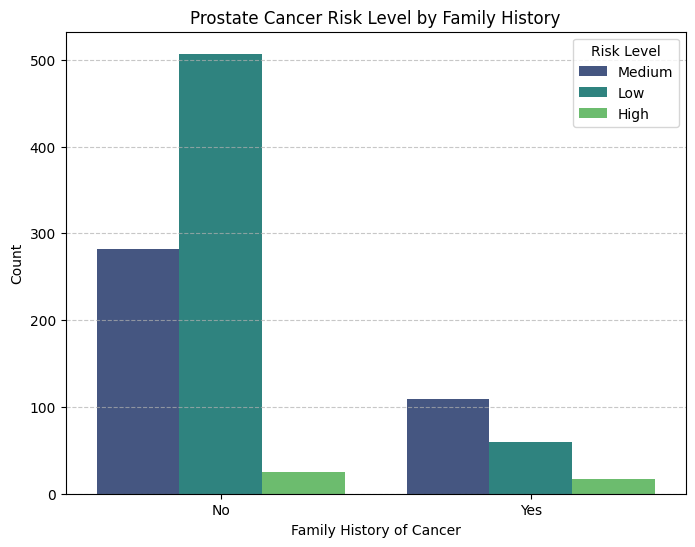


Contingency Table (family_history vs. risk_level) - Row Percentages:
risk_level       High    Low  Medium
family_history                      
No              0.031  0.623   0.346
Yes             0.091  0.323   0.586


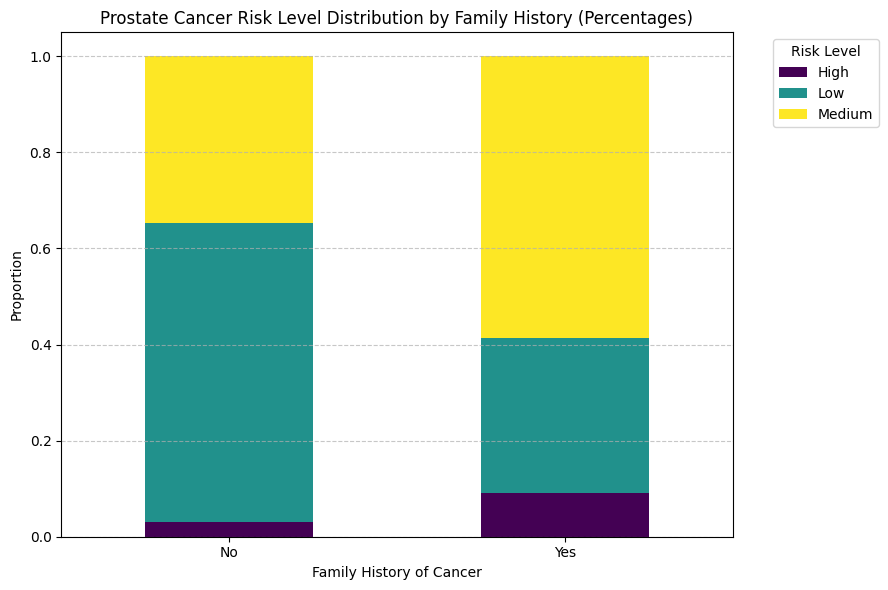

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('synthetic_prostate_cancer_risk.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'synthetic_prostate_cancer_risk.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Display the first few rows and column information
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

# Create a contingency table (cross-tabulation) of family_history and risk_level
contingency_table = pd.crosstab(df['family_history'], df['risk_level'])
print("\nContingency Table (family_history vs. risk_level):")
print(contingency_table)

# Perform the Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
# print("\nExpected Frequencies Table:")
# print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Interpret the p-value
alpha = 0.05 # Significance level
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
    print(f"Conclusion: Since the P-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant association between 'family_history' and 'risk_level'.")
    print("This suggests that family history *does* significantly influence or is related to the estimated prostate cancer risk level.")
else:
    print(f"Conclusion: Since the P-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant association between 'family_history' and 'risk_level'.")

# Visualizing the relationship (optional but highly recommended for understanding)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='family_history', hue='risk_level', palette='viridis', order=['No', 'Yes'])
plt.title('Prostate Cancer Risk Level by Family History')
plt.xlabel('Family History of Cancer')
plt.ylabel('Count')
plt.legend(title='Risk Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize percentages for better comparison
# Calculate percentages within each family_history group
contingency_percentage = contingency_table.apply(lambda r: r/r.sum(), axis=1)
print("\nContingency Table (family_history vs. risk_level) - Row Percentages:")
print(contingency_percentage.round(3))

contingency_percentage.plot(kind='bar', stacked=True, figsize=(9, 6), colormap='viridis')
plt.title('Prostate Cancer Risk Level Distribution by Family History (Percentages)')
plt.xlabel('Family History of Cancer')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Contingency Table (smoker vs. alcohol_consumption):
alcohol_consumption  High  Moderate  None
smoker                                   
No                     97       197   193
Yes                    94       217   202

Chi-squared statistic: 0.54
P-value: 0.5192
Degrees of Freedom: 2

Significance level (alpha): 0.05

Contingency Table (smoker vs. alcohol_consumption) - Row Percentages:
alcohol_consumption   None  Moderate   High
smoker                                     
No                   0.396     0.405  0.199
Yes                  0.394     0.423  0.183


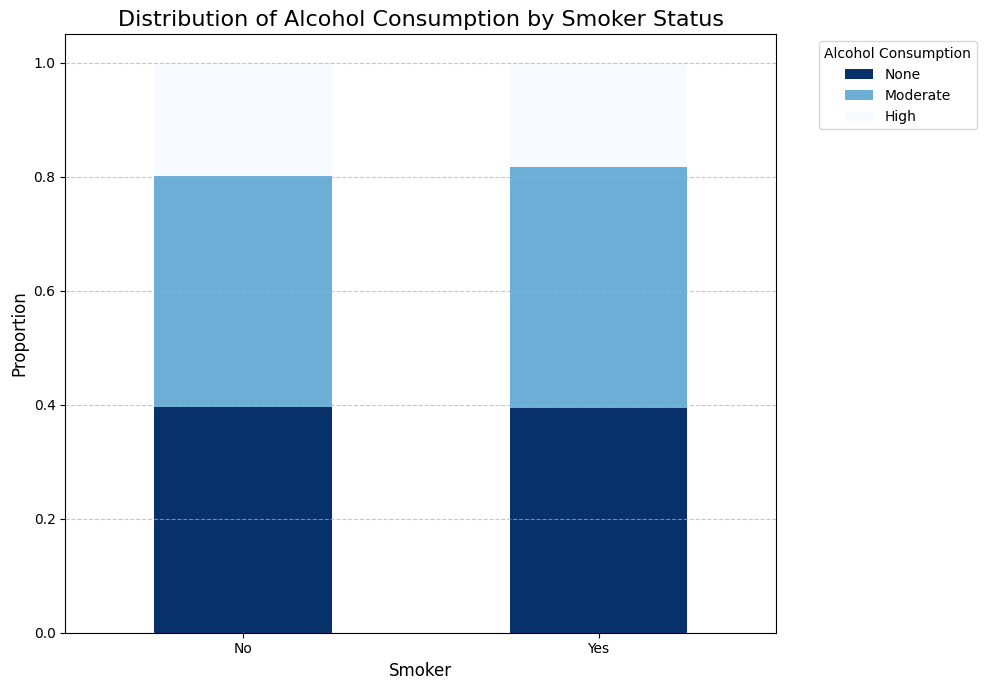

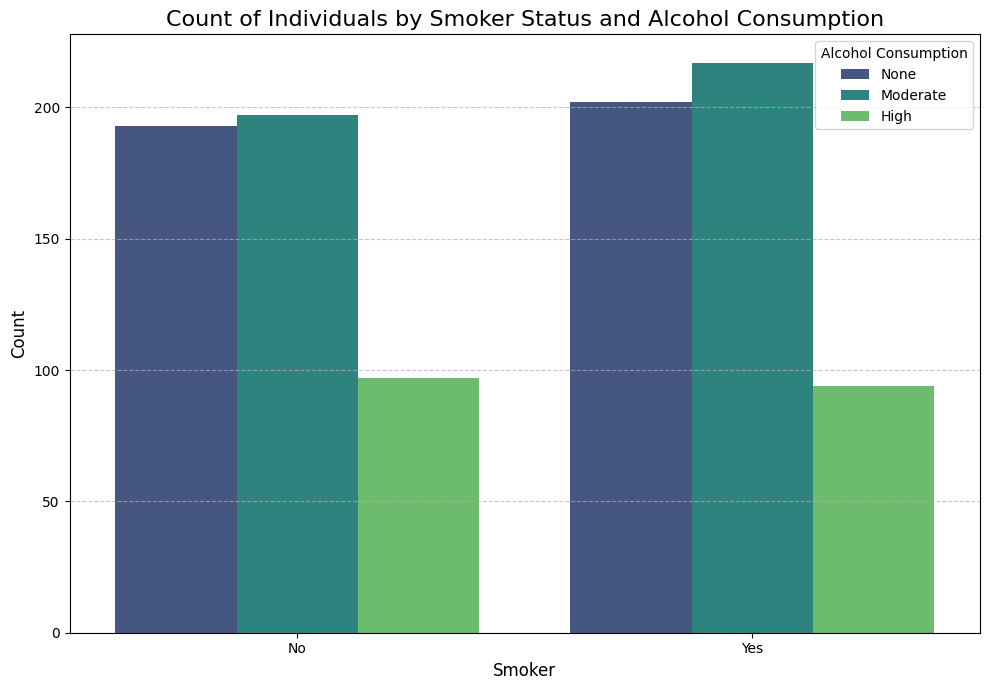

In [4]:
# Create a contingency table of smoker and alcohol_consumption
# Fill NaN values in 'alcohol_consumption' with 'None' to include them in the crosstab
df['alcohol_consumption'].fillna('None', inplace=True)
contingency_table_smoker_alcohol = pd.crosstab(df['smoker'], df['alcohol_consumption'])
print("\nContingency Table (smoker vs. alcohol_consumption):")
print(contingency_table_smoker_alcohol)

# Perform the Chi-squared test
chi2_smoker_alcohol, p_value_smker_alcohol, dof_smoker_alcohol, expected_smoker_alcohol = chi2_contingency(contingency_table_smoker_alcohol)

print(f"\nChi-squared statistic: {chi2_smoker_alcohol:.2f}")
print(f"P-value: {p_value_smoker_alcohol:.4f}")
print(f"Degrees of Freedom: {dof_smoker_alcohol}")

# Interpret the p-value placeholder (you will do this part later)
alpha = 0.05 # Significance level
print(f"\nSignificance level (alpha): {alpha}")

# Calculate percentages within each smoker group for better comparison
contingency_percentage_smoker_alcohol = contingency_table_smoker_alcohol.apply(lambda r: r/r.sum(), axis=1)

# Ensure the columns for alcohol consumption are in a logical order for plotting
order = ['None', 'Moderate', 'High']
# Reindex the columns to match the desired order, adding missing columns with 0 if necessary
contingency_percentage_smoker_alcohol = contingency_percentage_smoker_alcohol.reindex(columns=order, fill_value=0)

print("\nContingency Table (smoker vs. alcohol_consumption) - Row Percentages:")
print(contingency_percentage_smoker_alcohol.round(3))

# --- Attractive Visualization 1: Stacked Bar Chart for Proportions ---
plt.figure(figsize=(10, 7))
contingency_percentage_smoker_alcohol.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='Blues_r', ax=plt.gca())

plt.title('Distribution of Alcohol Consumption by Smoker Status', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Alcohol Consumption', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Use plt.show() to display the plot in an interactive environment

# --- Attractive Visualization 2: Countplot for Raw Counts ---
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='smoker', hue='alcohol_consumption', palette='viridis', order=['No', 'Yes'], hue_order=order)
plt.title('Count of Individuals by Smoker Status and Alcohol Consumption', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Alcohol Consumption', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Use plt.show() to display the plot in an interactive environment


Average Age by Risk Level:
risk_level
Low       53.827160
Medium    56.547315
High      60.214286
Name: age, dtype: float64


/tmp/ipython-input-5-539635720.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_age_by_risk.index, y=average_age_by_risk.values, palette='viridis')


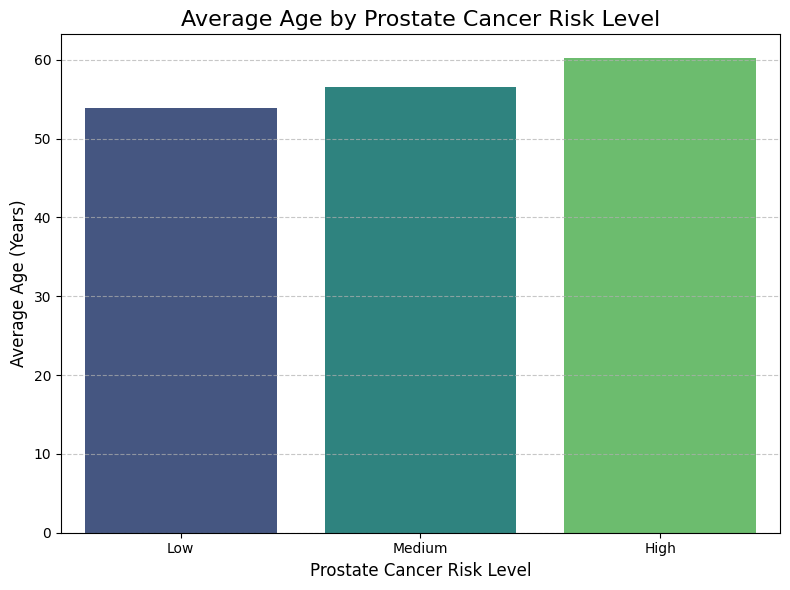

In [5]:

# Calculate the average age for each risk_level
average_age_by_risk = df.groupby('risk_level')['age'].mean().reindex(['Low', 'Medium', 'High'])
print("\nAverage Age by Risk Level:")
print(average_age_by_risk)

# Visualize the average age by risk level
plt.figure(figsize=(8, 6))
sns.barplot(x=average_age_by_risk.index, y=average_age_by_risk.values, palette='viridis')
plt.title('Average Age by Prostate Cancer Risk Level', fontsize=16)
plt.xlabel('Prostate Cancer Risk Level', fontsize=12)
plt.ylabel('Average Age (Years)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Display the plot